In [1]:
import pickle
import hyperopt
from matplotlib import pyplot as plt
import numpy as np

In [8]:
data_folder = "/mnt/c/Users/Diego/Desktop/50000"
with open(data_folder + "/1604659496.734427trials.pickle", 'rb') as pickled:
    trials = pickle.load(pickled)
    pickled.close()


In [10]:
X = []
Y = []
Z = []
for trial in trials:
    #print(trial)§
    #tr_id = trial['tid']
    X.append(trial["misc"]["vals"]["c"])
    Y.append(trial["misc"]["vals"]["csi"])
    Z.append(-trial["result"]["loss"])
    # print(trials.trial_attachments(tr_id))

x = np.array(X)
y = np.array(Y)
z = np.array(Z)

Text(0.5, 0.92, 'surface')

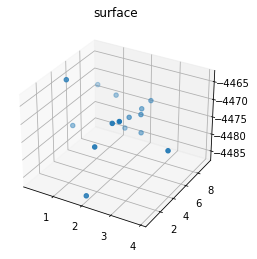

In [11]:
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z)
ax.set_title('surface')

In [14]:
x = x.squeeze()
y = y.squeeze()
z = z.squeeze()

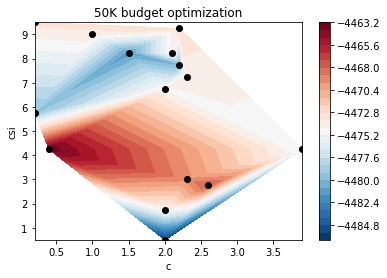

In [30]:
plt.figure()
cntr = plt.tricontourf(x,y,z, 30, cmap="RdBu_r") # choose 20 contour levels, just to show how good its interpolation is
plt.plot(x,y, 'ko ')
plt.colorbar(cntr)
plt.title("50K budget optimization")
plt.xlabel("c")
plt.ylabel("csi")
plt.savefig("../figures/50K_hyperopt.jpg")

In [31]:
params = [{'csi': 4.5, 'c': 3.6}, {'c': 0.9, 'csi': 4.0}, {'c': 4.0, 'csi': 6.25}, {'c': 1.7, 'csi': 3.5}, {'c': 2.7, 'csi': 8.75}, {'c': 0.2, 'csi': 4.25}, {'c': 0.1, 'csi': 7.75}, {'c': 2.90, 'csi': 1.75}, {'c': 1.6, 'csi': 5.25}, {'c': 3.30, 'csi': 7.0}, {'c': 0.5, 'csi': 6.75}, {'c': 0.4, 'csi': 9.0}, {'c': 3.2, 'csi': 2.5}, {'c': 2.2, 'csi': 6.5}, {'c': 1.40, 'csi': 0.5}, {'c': 1.0, 'csi': 8.25}, {'c': 0.30, 'csi': 1.5}, {'c': 0.70, 'csi': 2.75}, {'c': 2.8000000000000003, 'csi': 9.75}, {'c': 1.30, 'csi': 7.5}, {'c': 0.6, 'csi': 2.0}]
returns = [-4478.456439343232, -4478.816559656918, -4481.606559312882, -4474.85563965225, -4479.524071312769, -4481.6822981611795, -4478.151233911069, -4480.290479569757, -4477.151153795964, -4475.7079485890035, -4478.927829943108, -4475.514386733494, -4487.480897277956, -4481.672794726702, -4486.109573448567, -4482.0905454673575, -4487.071395038144, -4477.650400401932, -4478.122566284201, -4482.424867025317, -4487.460027412892]

x = []
y = []
z = np.array(returns).squeeze()

for p_set in params:
    x.append(p_set["c"])
    y.append(p_set["csi"])

x = np.array(x).squeeze()
y = np.array(y).squeeze()

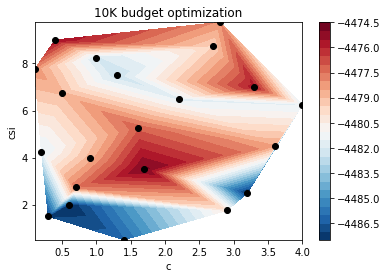

In [32]:
plt.figure()
cntr = plt.tricontourf(x,y,z, 30, cmap="RdBu_r") # choose 20 contour levels, just to show how good its interpolation is
plt.plot(x,y, 'ko ')
plt.colorbar(cntr)
plt.title("10K budget optimization")
plt.xlabel("c")
plt.ylabel("csi")
plt.savefig("../figures/10K_hyperopt.jpg")

In [10]:
import json
logs_folder = "/mnt/c/Users/Diego Piccinotti/Documents/Università/alphazero_singleplayer/logs/hyperopt/RaceStrategy-v2/ol_uct_var/10000/1605025095.1713483"
x, y, z = [], [], []
for entry in os.scandir(logs_folder):
    if entry.is_dir():
        res_path = os.path.join(logs_folder, entry.name, "results.npy")
        pars_path = os.path.join(logs_folder, entry.name, "parameters.txt")
        res = np.load(res_path)
        z.append(np.mean(res))
        
        with open(pars_path, "r") as f:

            pars = json.load(f)
            x.append(float(pars["c"]))
            y.append(float(pars["csi"]))

            f.close()

x = np.array(x).squeeze()
y = np.array(y).squeeze()
z = np.array(z).squeeze()

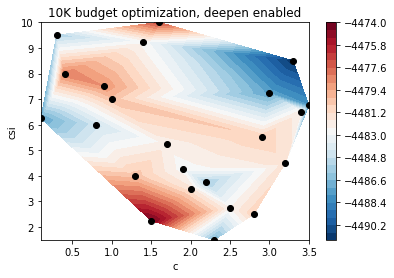

In [12]:
plt.figure()
cntr = plt.tricontourf(x,y,z, 30, cmap="RdBu_r") # choose 20 contour levels, just to show how good its interpolation is
plt.plot(x,y, 'ko ')
plt.colorbar(cntr)
plt.title("10K budget optimization, deepen enabled")
plt.xlabel("c")
plt.ylabel("csi")
plt.savefig("../figures/10K_mango_deepen.jpg")